In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.stats import wasserstein_distance
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
with open('st_data_cgid.pkl', 'rb') as f:
    st_data_cgid = pickle.load(f)

with open('st_data_quiver.pkl', 'rb') as f:
    st_data_quiver = pickle.load(f)

In [3]:
st_data = st_data_cgid.copy()

st_hist_data = [np.concatenate(st_data[unit_idx]) for unit_idx in range(len(st_data))]
st_hist_data = [st_hist_data[unit_idx] for unit_idx in range(len(st_hist_data)) if len(st_hist_data[unit_idx]) > 0]
num_units = len(st_hist_data)

median_data = [np.median(st_hist_data[unit_idx]) for unit_idx in range(num_units)]
count_data = [len(st_hist_data[unit_idx]) for unit_idx in range(num_units)]

num_units = len(st_hist_data)

dist_mat = np.zeros((num_units, num_units))
for unit_idx1 in range(num_units):
    for unit_idx2 in range(unit_idx1, num_units):
        dist = wasserstein_distance(st_hist_data[unit_idx1], st_hist_data[unit_idx2])
        dist_mat[unit_idx1, unit_idx2] = dist
        dist_mat[unit_idx2, unit_idx1] = dist




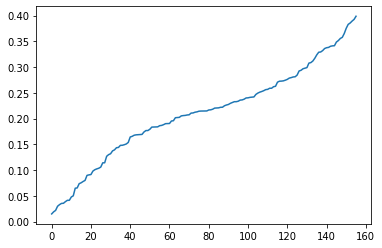

In [4]:
plt.plot(np.sort(median_data))

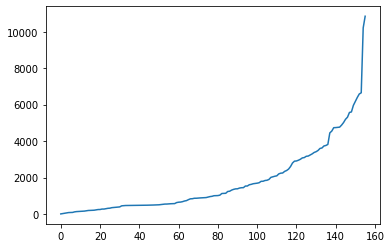

In [5]:
plt.plot(np.sort(count_data))

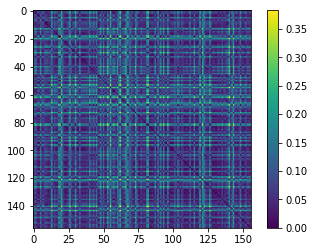

In [4]:
plt.imshow(dist_mat)
plt.colorbar()

In [19]:
tsne = TSNE(n_components=2, perplexity=10, init='pca', learning_rate='auto')
kmeans = KMeans(n_clusters=5)

points = tsne.fit_transform(dist_mat)
points_class = kmeans.fit_predict(points)

/home/ntolley/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


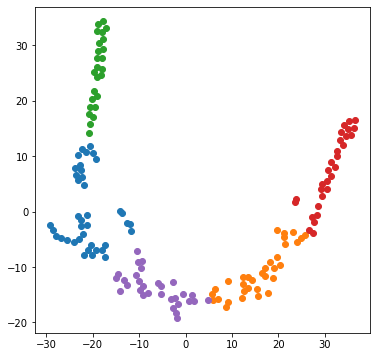

In [20]:
plt.figure(figsize=(6,6))
for class_idx in range(5):
    plot_points = points[points_class == class_idx]
    plt.scatter(plot_points[:,0], plot_points[:,1], color=f'C{class_idx}')

In [17]:
points_class

array([4, 1, 4, 2, 2, 1, 0, 0, 4, 4, 4, 4, 4, 3, 2, 3, 0, 0, 1, 1, 3, 4,
       2, 2, 0, 0, 3, 4, 0, 0, 3, 0, 2, 1, 0, 0, 0, 0, 0, 4, 3, 0, 0, 3,
       0, 3, 4, 4, 1, 0, 1, 2, 4, 1, 4, 3, 4, 1, 1, 2, 1, 3, 3, 4, 4, 1,
       1, 3, 3, 1, 0, 2, 4, 1, 3, 2, 2, 1, 2, 4, 4, 3, 3, 2, 2, 0, 2, 1,
       2, 3, 4, 1, 2, 1, 2, 2, 1, 4, 2, 0, 2, 3, 4, 3, 3, 2, 3, 4, 2, 2,
       4, 2, 3, 4, 2, 1, 2, 2, 4, 3, 0, 1, 3, 0, 0, 0, 3, 0, 2, 4, 2, 2,
       4, 4, 2, 1, 2, 4, 4, 4, 1, 2, 3, 1, 2, 0, 2, 4, 3, 2, 4, 0, 0, 4,
       4, 2], dtype=int32)

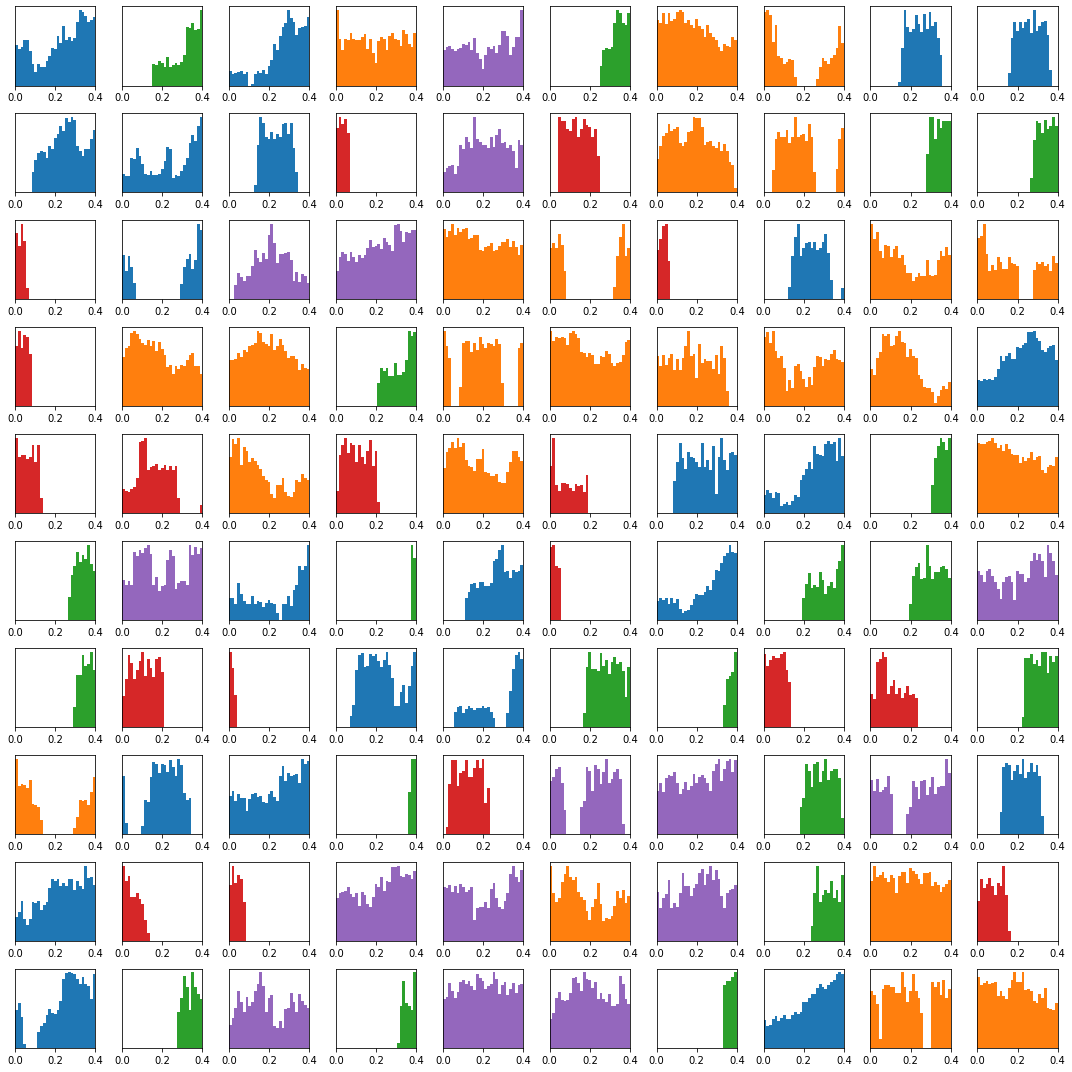

In [21]:
bins = np.linspace(0, 0.4, 30)
plt.figure(figsize=(15,15))
for unit_idx in range(0,100):
    plt.subplot(10,10,unit_idx+1)
    plt.hist(st_hist_data[unit_idx], bins=bins, color=f'C{points_class[unit_idx]}')
    plt.xlim(0, 0.4)
    plt.yticks([])
plt.tight_layout()